In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def read_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image
    

image = read_image("./data/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/N15.jpg")

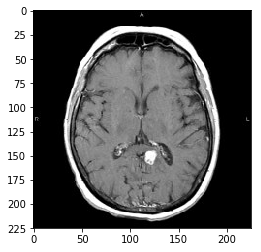

In [89]:
plt.imshow(image)

In [90]:
grayimage = tf.image.rgb_to_grayscale(image)
grayimage.shape

TensorShape([225, 225, 1])

In [96]:
reshape_image = tf.reshape(grayimage, shape=(1, 225, 225, 1))

In [109]:
sobel_grads = tf.image.sobel_edges(reshape_image)
sobel_x = sobel_grads[0, :, :, :, 0]
sobel_y = sobel_grads[0, :, :, :, 0]

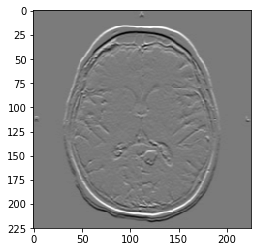

In [113]:
plt.imshow(tf.reshape(sobel_x, (225, 225)), cmap=plt.cm.gray)

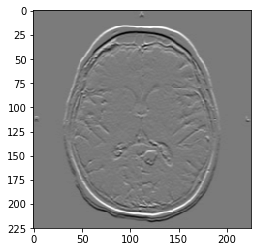

In [114]:
plt.imshow(tf.reshape(sobel_y, (225, 225)), cmap=plt.cm.gray)

In [119]:
grad_mag_components = sobel_grads ** 2

grad_mag_square = tf.math.reduce_sum(grad_mag_components,axis=-1) # sum all magnitude components

grad_mag_img = tf.sqrt(grad_mag_square)

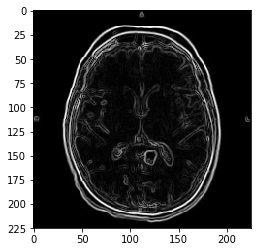

In [120]:
plt.imshow(tf.reshape(grad_mag_img, (225, 225)), cmap=plt.cm.gray)

In [121]:
sobel_grads.shape

TensorShape([1, 225, 225, 1, 2])